In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# File name: opa2018b_error_sky_distribution.py
"""
Created on Sun May 27 15:28:04 2018

@author: Neo(liuniu@smail.nju.edu.cn)

Plot the error sky distribution of opa2018b solution, using Gaia DR2 as a reference.

"""

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from astropy import units as u
from astropy.coordinates import SkyCoord
from matplotlib import pyplot as plt, cm as cm
import numpy as np
from numpy import cos, deg2rad, sqrt
# My modules
from read_sou import read_cat
from read_GaiaDR2 import read_gaiadr2_iers_position
from cross_match import list_crossmatch

In [2]:
# Load VLBI solution opa2018b
vlbi_cat = "../data/opa-sx-180425-GA15.cat"
[ivs_name_v, iers_name_v, ra_v, dec_v, ra_error_v, dec_error_v,
 ra_dec_corr_v, num_ses, num_obs] = read_cat(vlbi_cat)

# Load Gaia DR2 data
gaia_cat = "../data/gaiadr2_iers.fits"
[iers_name_g, ra_g, ra_error_g,
 dec_g, dec_error_g, ra_dec_corr_g] = read_gaiadr2_iers_position(gaia_cat)

In [3]:
# Cross-match between between two catalogs
comsou_iers, ind_v, ind_g = list_crossmatch(iers_name_v, iers_name_g)
print("There are %d common source between opa solution and Gaia DR2" %comsou_iers.size)

# Verify the result of cross-match
soucom_v = np.take(iers_name_v, ind_v)
soucom_g = np.take(iers_name_g, ind_g)
for i, (comsoui, soucom_vi, soucom_gi) in enumerate(
        zip(comsou_iers, soucom_v, soucom_g)):

    if comsoui != soucom_vi:
        print("%dth source %s are not consistented in list1 %s." %
              (i, comsoui, soucom_vi))

    if comsoui != soucom_gi:
        print("%dth source %s are not consistented in list2 %s." %
              (i, comsoui, soucom_gi))


# Extract data for common source
# VLBI data
comsou_ivs = np.take(ivs_name_v, ind_v)
ra_com_v = np.take(ra_v, ind_v)
dec_com_v = np.take(dec_v, ind_v)
ra_error_com_v = np.take(ra_error_v, ind_v)
dec_error_com_v = np.take(dec_error_v, ind_v)
ra_dec_corr_com_v = np.take(ra_dec_corr_v, ind_v)
num_ses_com = np.take(num_ses, ind_v)
num_obs_com = np.take(num_obs, ind_v)

# Gaia data
ra_com_g = np.take(ra_g, ind_g)
dec_com_g = np.take(dec_g, ind_g)
ra_error_com_g = np.take(ra_error_g, ind_g)
dec_error_com_g = np.take(dec_error_g, ind_g)
ra_dec_corr_com_g = np.take(ra_dec_corr_g, ind_g)

There are 2782 common source between opa solution and Gaia DR2


In [4]:
# Transform the coordinate into an astropy.coordinate.SkyCoord object
## opa solution
coord_v = SkyCoord(ra=ra_com_v*u.deg, dec=dec_com_v*u.deg)
# The mid-point of skyplot will be 0
ra_rad_v = coord_v.ra.wrap_at(180 * u.deg).radian
dec_rad_v = coord_v.dec.radian

## Gaia DR2
coord_g = SkyCoord(ra=ra_com_g*u.deg, dec=dec_com_g*u.deg)
ra_rad_g = coord_g.ra.wrap_at(180 * u.deg).radian
dec_rad_g = coord_g.dec.radian

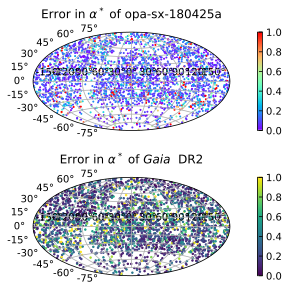

In [5]:
# Plot the formal error distribution of RA
plt.figure(figsize=(8, 4.2))

plt.subplot(211, projection="aitoff")
plt.title("Error in $\\alpha^*$ of opa-sx-180425a", y=1.08)
plt.scatter(ra_rad_v, dec_rad_v, marker=".", s=5, 
            c=ra_error_com_v, vmin=0, vmax=1, cmap="rainbow")
plt.colorbar()
plt.grid(True)

plt.subplot(212, projection="aitoff")
plt.title("Error in $\\alpha^*$ of ${\it Gaia}$  DR2", y=1.08)
plt.scatter(ra_rad_g, dec_rad_g, marker=".", s=10, 
            c=ra_error_com_g, vmin=0, vmax=1, cmap="viridis")
plt.colorbar()
plt.grid(True)
# 
# plt.subplots_adjust(top=0.95, bottom=0.05)
plt.tight_layout()

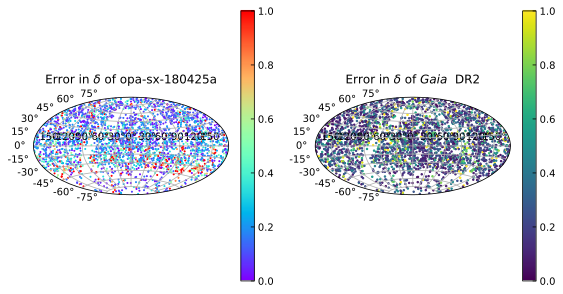

In [6]:
# Plot the formal error distribution of Dec
plt.figure(figsize=(8, 4.2))

plt.subplot(121, projection="aitoff")
plt.title("Error in $\\delta$ of opa-sx-180425a", y=1.08)
plt.scatter(ra_rad_v, dec_rad_v, marker=".", s=5, 
            c=dec_error_com_v, vmin=0, vmax=1, cmap="rainbow")
plt.colorbar()
plt.grid(True)

plt.subplot(122, projection="aitoff")
plt.title("Error in $\\delta$ of ${\it Gaia}$  DR2", y=1.08)
plt.scatter(ra_rad_g, dec_rad_g, marker=".", s=10, 
            c=dec_error_com_g, vmin=0, vmax=1, cmap="viridis")
plt.colorbar()
plt.grid(True)
# 
# plt.subplots_adjust(top=0.95, bottom=0.05)
plt.tight_layout()

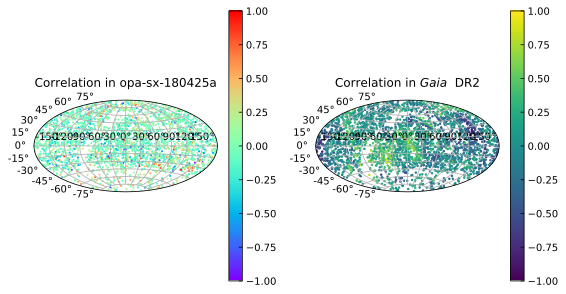

In [7]:
# Plot the formal error distribution of Dec
plt.figure(figsize=(8, 4.2))

plt.subplot(121, projection="aitoff")
plt.title("Correlation in opa-sx-180425a", y=1.08)
plt.scatter(ra_rad_v, dec_rad_v, marker=".", s=5, 
            c=ra_dec_corr_com_v, vmin=-1, vmax=1, cmap="rainbow")
plt.colorbar()
plt.grid(True)

plt.subplot(122, projection="aitoff")
plt.title("Correlation in ${\it Gaia}$  DR2", y=1.08)
plt.scatter(ra_rad_g, dec_rad_g, marker=".", s=10, 
            c=ra_dec_corr_com_g, vmin=-1, vmax=1, cmap="viridis")
plt.colorbar()
plt.grid(True)
# 
# plt.subplots_adjust(top=0.95, bottom=0.05)
plt.tight_layout()